In [150]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving dokev.txt to dokev (2).txt


In [3]:

uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving dokev7.jpg to dokev7 (1).jpg


In [148]:
#textfile.replace('펄 어비스', '펄_어비스')

In [4]:
with open(textfile) as fp:
    text = fp.read()

In [6]:
!pip install customized_konlpy > /dev/null

In [9]:
from ckonlpy.tag import Twitter
twt = Twitter()
twt.add_dictionary('펄어비스','Noun')
twt.add_dictionary('펄 어비스','Noun')
twt.nouns('펄 어비스')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['펄', '어비스']

In [10]:
trans_dict = {'펄 어비스':'펄어비스'}
change_list = list(trans_dict.keys())

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
tokens = okt.nouns(text)
tokens[:10]

['펄', '어비스', '도깨비', '게임', '플레이', '분석', '전', '게임', '속', '세상']

In [ ]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [ ]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

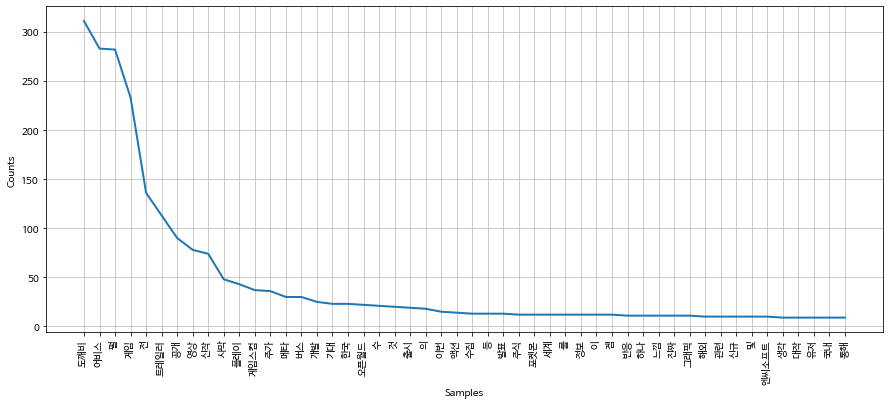

In [ ]:
gift = nltk.Text(new_tokens, name='도깨비')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [ ]:
stoptext = """
    전 수 것 의 이번 등 발표 이 겜 진짜 느낌 하나 반응 및 신규 관련 생각 국내 속 다시 
    분석 출시 기대 신작 영상 공개 보고 
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['펄', '어비스', '도깨비', '게임', '플레이', '게임', '세상', '동심', '요소', '남녀']

In [ ]:
from wordcloud import WordCloud
from PIL import Image


In [ ]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))


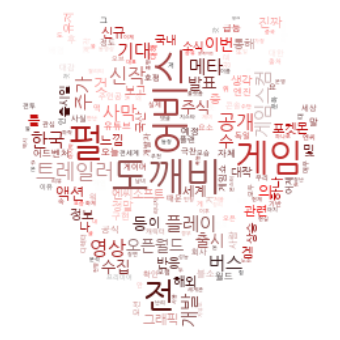

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)


In [ ]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))


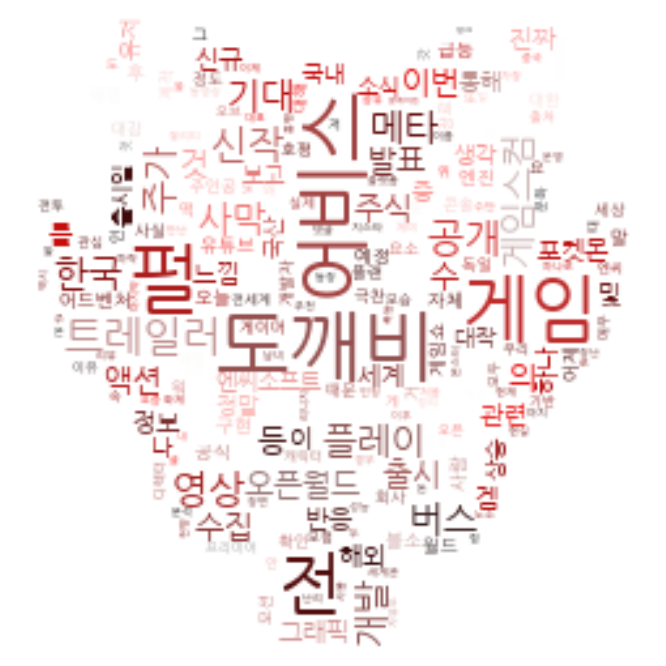

In [ ]:

fig = plt.figure(figsize=(12  ,12))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
fig.savefig('wc_dokev.png')